In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [30]:
file_path = os.path.join('..', 'aggregated_data.csv')
data = pd.read_csv(file_path)

# inflation adjustment
base_cpi = data['CPI_US'].iloc[-1]
data['AVG_PRICE_AUCTION'] = data['AVG_PRICE_AUCTION'] * (base_cpi/data['CPI_US'])
data['CORN_FUTURES_TYPICAL_PRICE'] = data['CORN_FUTURES_TYPICAL_PRICE'] * (base_cpi/data['CPI_US'])
data['FEEDER_CATTLE_FUTURES_TYPICAL_PRICE'] = data['FEEDER_CATTLE_FUTURES_TYPICAL_PRICE'] * (base_cpi/data['CPI_US'])
data['US_MXN_RATES'] = data['US_MXN_RATES'] * (base_cpi/data['CPI_US'])
data['DIESEL_RETAIL_PRICE'] = data['DIESEL_RETAIL_PRICE'] * (base_cpi/data['CPI_US'])
data['DATE'] = pd.to_datetime(data['DATE'])

data = data.sort_values('DATE', ignore_index=True).set_index('DATE')
# .drop( # drop columns not used for training
#     ['avg_price_steers_ML1', 
#      'avg_price_steers_ML1_2', 
#      'avg_price_heifers_ML1', 
#      'avg_price_heifers_ML1_2', 
#      'NATIONAL_AUCTION_SALES', 
#      'NATIONAL_TOTAL_SALES', 
#      'TEXAS_AUCTION_SALES', 
#     #  'CORN_FUTURES_TYPICAL_PRICE', 
#     #  'DIESEL_RETAIL_PRICE', 
#     #  'ALFAFA_HAY_PPI', 
#     #  'CORN_PPI',
#     #  'US_MXN_RATES',
#      ], axis=1)


In [31]:
def plot_correlation_matrix(df, title):
    plt.figure(figsize=(8, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)#, fmt='.2f', square=True, linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# diff_data = data.diff().dropna()
# plot_correlation_matrix(data,'Pre-differencing')
# plot_correlation_matrix(diff_data, "Correlation Matrix - Differenced Data")

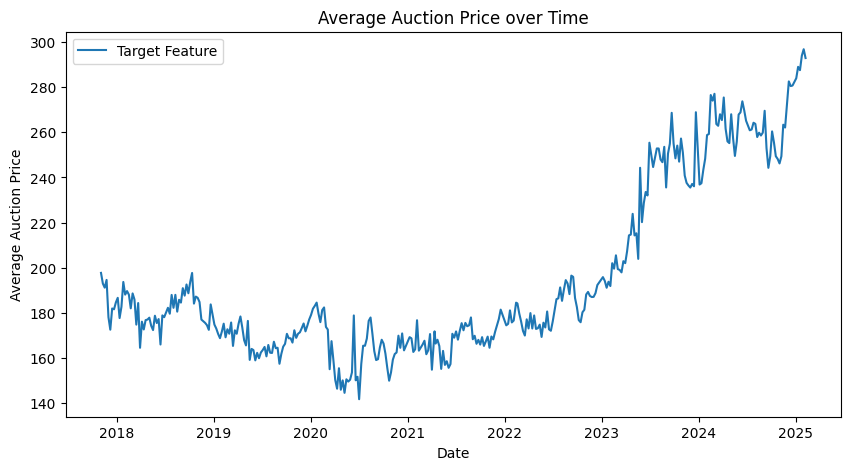

In [32]:
target = data['AVG_PRICE_AUCTION']

plt.figure(figsize=(10, 5))
plt.plot(target.index, target, label='Target Feature')
plt.title('Average Auction Price over Time')
plt.ylabel('Average Auction Price')
plt.xlabel('Date')
plt.legend()
plt.savefig(os.path.join('..', 'figures', 'target_feature_plot.png'), dpi=300)
plt.show()

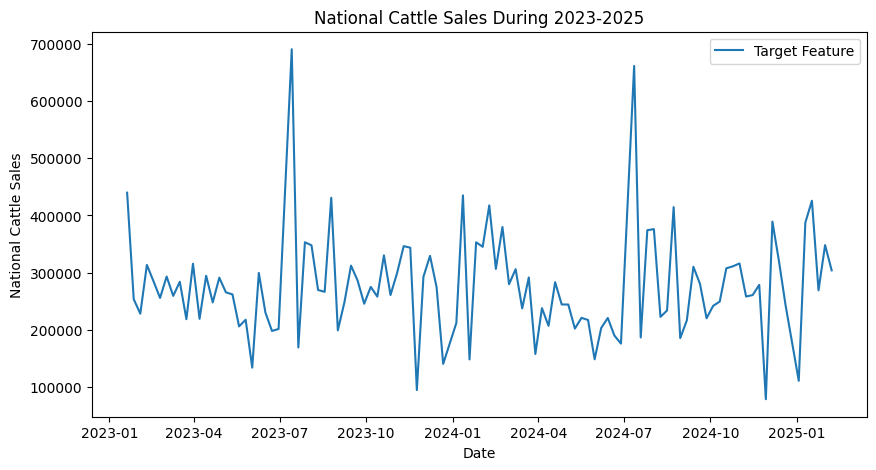

In [40]:
sales = data['NATIONAL_TOTAL_SALES']

plt.figure(figsize=(10, 5))
plt.plot(sales.index[-104:], sales[-104:], label='Target Feature')
plt.title('National Cattle Sales During 2023-2025')
plt.ylabel('National Cattle Sales')
plt.xlabel('Date')
plt.legend()
plt.savefig(os.path.join('..', 'figures', 'cattle_sales.png'), dpi=300)
plt.show()